# Example 01 - Introduction to Traffic Network Data Structure

## 1 Load traffic network data

The data platform (`mtldp.utils`) package can help to load the parsed OSM data with well-defined traffic network class:

In [1]:
from mtldp.utils import show_attributes_and_methods
from mtldp.utils.data_io import load_traffic_network_from_pickle, save_network_geometry_to_json

In [2]:
traffic_network = load_traffic_network_from_pickle('data/birmingham.tn')

In [3]:
# Attriutes of node
show_attributes_and_methods(traffic_network)

attributes: {'ways', 'bounds', 'region_name', 'lanesets', 'segments', 'movements', 'end_node_list', 'signalized_node_list', 'networkx_mode', 'arterials', 'links', 'unsignalized_node_list', 'networkx_graph', 'nodes', 'city_id'}

methods: {'add_way', 'add_node', 'add_laneset', 'add_arterial', 'add_movement', 'add_segment', 'reset_bound', 'add_link'}


This network class has different map components including the `segments`, `ways`, `links`, etc. They are stored as `dict` in the network class.

## 2 Basic data structure

### 2.1 Nodes

In [4]:
node_example = list(traffic_network.nodes.values())[9]
print([node_example.node_id, node_example.type, node_example.name, [node_example.latitude, node_example.longitude]])

['61841975', 'signalized', 'Co278:East Brown Street/South Old Woodward Avenue', [42.544789, -83.212422]]


In [5]:
# Attriutes of node
show_attributes_and_methods(node_example)

attributes: {'node_id', 'belonged_sup_arterial', 'traverse_ways', 'upstream_links', 'upstream_lanesets', 'timing_plan', 'v_c_ratio', 'connector_list', 'downstream_links', 'downstream_lanes', 'osm_attrib', 'osm_tags', 'longitude', 'od_ways', 'upstream_lanes', 'downstream_segments', 'upstream_segments', 'type', 'movement_list', 'downstream_lanesets', 'name', 'latitude'}

methods: {'generate_basic_info', 'init_from_node', 'add_movement', 'is_intersection', 'add_connector', 'is_ordinary_node', 'get_upstream_junctions'}


### 2.2 Movements

In [6]:
movement_example = node_example.movement_list[4]
print([movement_example.movement_id, movement_example.direction, movement_example.upstream_length, movement_example.lane_number])

['61841981_61841975_62189321', 's', 90.75932121059373, 1]


In [7]:
# Attriutes of way
show_attributes_and_methods(movement_example)

attributes: {'conflicting_movements', 'protected', 'direction', 'downstream_link', 'lane_number', 'same_approach_through_movement', 'upstream_length', 'share_lane_movements', 'movement_id', 'upstream_link', 'node', 'geometry', 'share_approach_movements', 'laneset_list', 'belonged_arterial', 'buffer_length', 'index'}

methods: {'set_basic_info', 'get_geometry', 'to_dict', 'to_df'}


### 2.3 Lanesets

In [8]:
laneset_example = list(traffic_network.lanesets.values())[0]
print([laneset_example.laneset_id, laneset_example.speed_limit, laneset_example.from_direction])

['-1029971_0', 11.176, 'W']


In [9]:
# Attriutes of laneset
show_attributes_and_methods(laneset_example)

attributes: {'laneset_id', 'from_direction', 'free_travel_time', 'upstream_connectors', 'upstream_node', 'turning_direction', 'geometry', 'belonged_link', 'turning_ratio_list', 'downstream_node', 'lane_list', 'phase_id', 'speed_limit', 'length', 'insegment_offset', 'heading', 'downstream_connector', 'type', 'movement_list', 'lane_number', 'downstream_lanesets', 'belonged_segment'}

methods: set()


### 2.4 Segments

In [10]:
segment_example = list(traffic_network.segments.values())[0]
print([segment_example.segment_id, segment_example.belonged_link, segment_example.heading])

['-1026540', <mtldp.meta.TrafficNetwork.Link.Link object at 0x7fecba8dd4c0>, -42.599826779155755]


In [11]:
# Attriutes of segment
show_attributes_and_methods(segment_example)

attributes: {'downstream_directions', 'node_list', 'from_direction', 'upstream_node', 'laneset_list', 'upstream_connectors', 'laneset_num', 'geometry', 'belonged_link', 'osm_attrib', 'downstream_node', 'osm_tags', 'downstream_directions_info', 'lane_assignment', 'speed_limit', 'length', 'downstream_segments', 'upstream_segments', 'heading', 'lane_number', 'downstream_connectors', 'osm_way', 'osm_direction_flag', 'segment_id'}

methods: set()


In [12]:
# Find related node
segment_example.downstream_node.name

'Co276:North Old Woodward Avenue/North Old Woodward Avenue'

### 2.5 Links

In [13]:
link_example = list(traffic_network.links.values())[0]
print([link_example.link_id, link_example.from_direction, link_example.length])

['-102387_62216876', 'S', 79.68515699850988]


In [14]:
# Attriutes of link
show_attributes_and_methods(link_example)

attributes: {'link_id', 'node_list', 'downstream_stopbar_detail', 'speed_limit', 'length', 'from_direction', 'upstream_clearance', 'upstream_clearance_detail', 'upstream_node', 'segment_list', 'downstream_node', 'buffer_segments', 'downstream_stopbar', 'buffer_length', 'heading', 'belonged_arterial', 'geometry'}

methods: {'to_dict', 'to_df'}


### 2.6 Arterial

In [15]:
arterial_example = list(traffic_network.arterials.values())[0]
print([arterial_example.arterial_id, list(arterial_example.oneways.keys()), arterial_example.ref_node])

['Maple Rd', ['E', 'W'], '62183487']


In [16]:
show_attributes_and_methods(arterial_example)

attributes: {'ref_node', 'arterial_id', 'oneways'}

methods: {'get_node_list'}


### 2.7 OnewayArterial

An Arterial contains two OnewayArterial in each directions. Both OnewayArterials of an Arterials can be fetched by the `.oneways` attribute of Arterial, which is a `dict` (key: direction, value: `OnewayArterial`)

In [17]:
oneway_example = list(arterial_example.oneways.values())[0]
print([oneway_example.direction, oneway_example.sup_arterial, oneway_example.length])

['E', <mtldp.meta.TrafficNetwork.Arterial.Arterial object at 0x7fecba8615b0>, 875.307677216306]


In [18]:
# Attributes of OnewayArterial

show_attributes_and_methods(oneway_example)

attributes: {'distance_by_link', 'direction', 'node_list', 'movement_list', 'sup_arterial', 'link_list', 'name', 'length', 'origin_node', 'distance_by_node', 'destination_node', 'path_id', 'distance_by_movement', 'geometry', 'network'}

methods: set()


An OnewayArterial is along a specific direction, so the nodes, links, and movements in `.node_list`, `.movemet_list`, and `link_list` are ordered along `from_direction`

In [19]:
# Go through the movement id list
print([movement.movement_id for movement in oneway_example.movement_list])

['62216795_62024965_62029635', '62024965_62029635_62216771', '62029635_62216771_62216769', '62216771_62216769_62216768', '62216769_62216768_62189314', '62216768_62189314_62176926', '62189314_62176926_62056068']


### 2.8 Visualize an Arterial

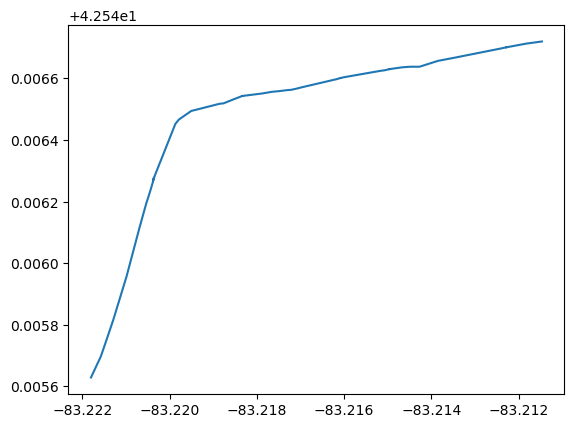

In [20]:
import matplotlib.pyplot as plt

plt.plot(oneway_example.geometry.lon, oneway_example.geometry.lat)

## 3 Our own  traffic network visualization website 

We provide a [website](https://michigan-traffic-lab.github.io/mtl-data-platform/map.html) to visualize the network class we get.

### 3.1 Save the traffic network to json

In [21]:
save_network_geometry_to_json(traffic_network, 'data/static.json')

### 3.2 Load the network 

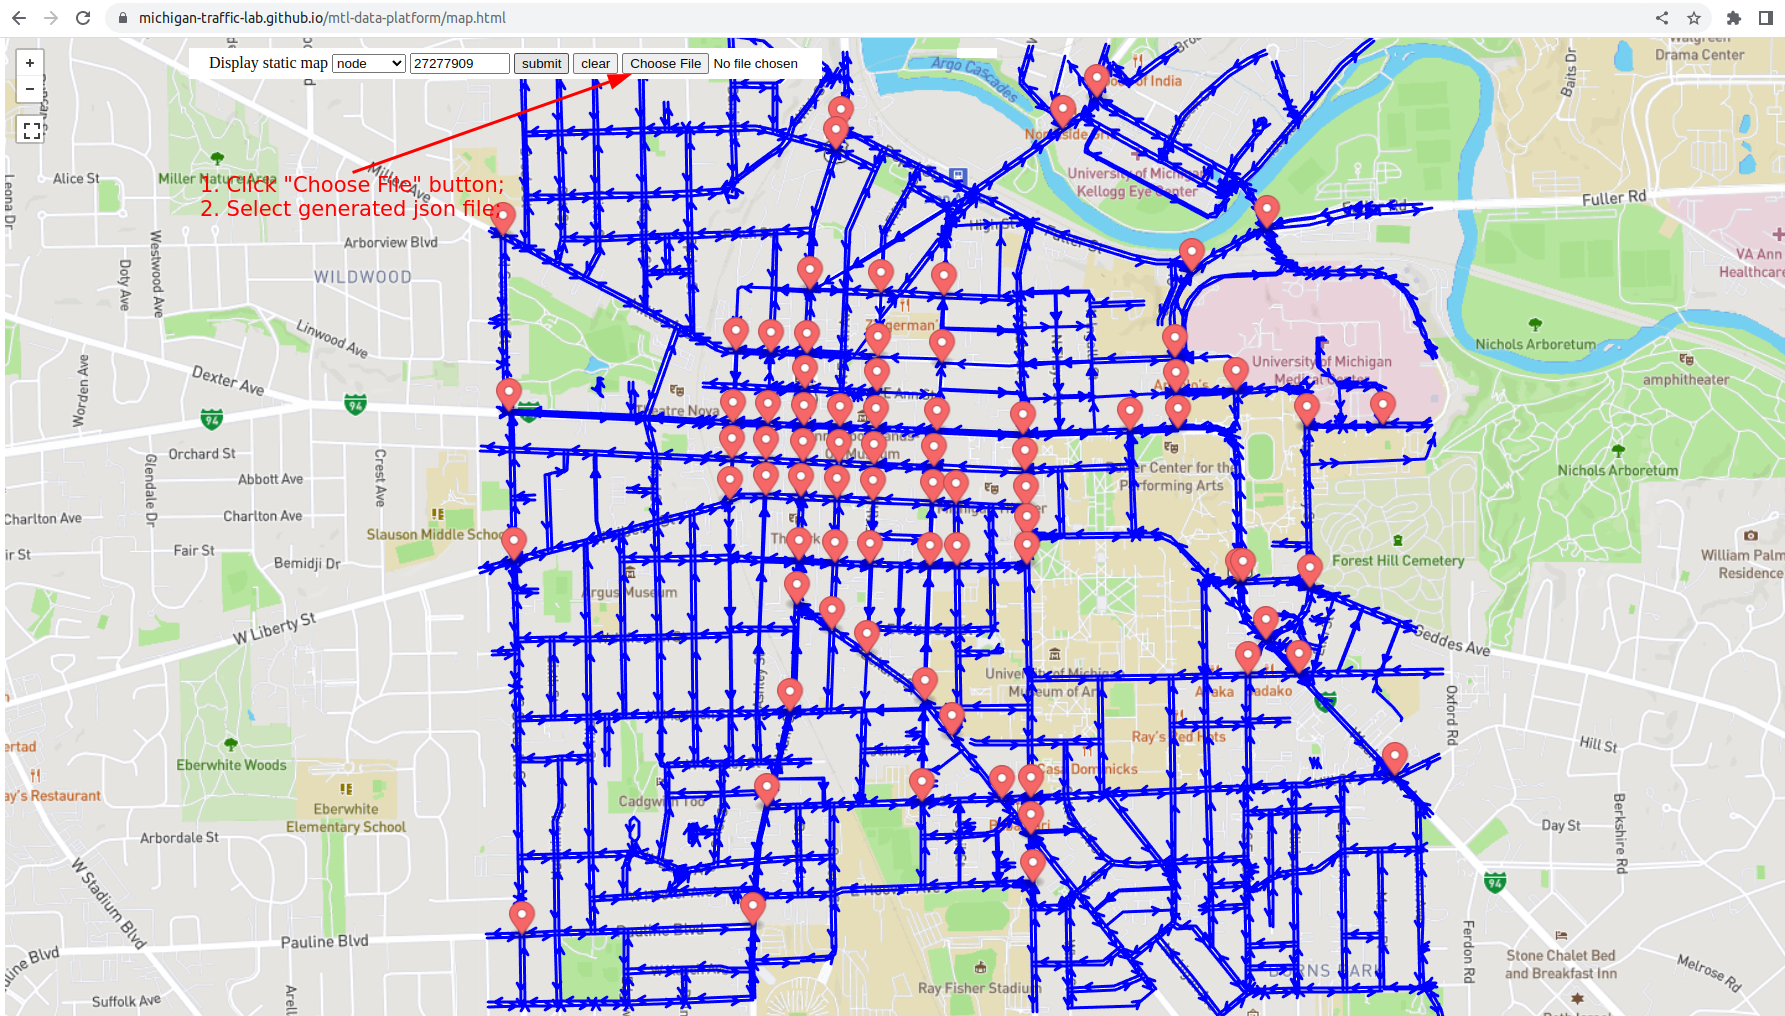